# Classification Test for CNN + Conv2d_NN

In [1]:
import sys 
sys.path.append('../')
import time
import os 


import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchsummary import summary 

from Conv2d_NN_spatial import Conv2d_NN_spatial
from Conv2d_NN import Conv2d_NN
from pixelshuffle import PixelShuffle1D, PixelUnshuffle1D


from data import MNIST, FashionMNIST, CIFAR10
from train import train_model, evaluate_accuracy 


### MNIST + FashionMNIST + CIFAR10 Data

Files already downloaded and verified
Files already downloaded and verified


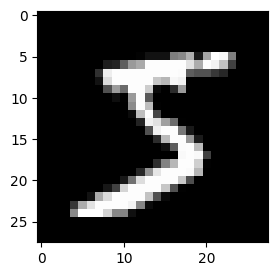

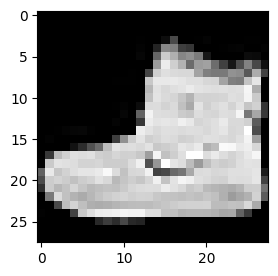

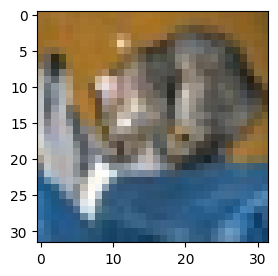

In [2]:
mnist = MNIST()
fashionmnist = FashionMNIST()
cifar10 = CIFAR10()



mnist.visual()
fashionmnist.visual()
cifar10.visual()


## I. MNIST + Fashion MNIST TEST

### i. Conv2d_NN all sample Model

In [3]:
# Model 
conv2d_nn_all = nn.Sequential(
   Conv2d_NN(
      in_channels=1,
      out_channels=5,
      K=8,
      stride=8,
      padding=0,
      shuffle_scale=2
   ), 
   Conv2d_NN(
      in_channels=5,
      out_channels=10,
      K=8,
      stride=8,
      padding=0,
      shuffle_scale=2
   ),
   Conv2d_NN(
      in_channels=10,
      out_channels=20,
      K=8,
      stride=8,
      padding=0,
      shuffle_scale=2
   ),
   nn.Flatten(), 
   nn.Linear(15680, 10)
   
).to('cpu')
   

from torchsummary import summary
summary(conv2d_nn_all, (1, 28, 28))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1               [-1, 4, 196]               0
            Conv1d-2              [-1, 20, 196]             660
              ReLU-3              [-1, 20, 196]               0
         Conv1d_NN-4              [-1, 20, 196]               0
         Conv2d_NN-5            [-1, 5, 28, 28]               0
           Flatten-6              [-1, 20, 196]               0
            Conv1d-7              [-1, 40, 196]           6,440
              ReLU-8              [-1, 40, 196]               0
         Conv1d_NN-9              [-1, 40, 196]               0
        Conv2d_NN-10           [-1, 10, 28, 28]               0
          Flatten-11              [-1, 40, 196]               0
           Conv1d-12              [-1, 80, 196]          25,680
             ReLU-13              [-1, 80, 196]               0
        Conv1d_NN-14              [-1, 

In [4]:
# MNIST results 
conv2d_nn_all.to('mps')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv2d_nn_all.parameters(), lr=0.001)
num_epochs = 10 
train_model(conv2d_nn_all, mnist.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(conv2d_nn_all, mnist.test_loader)


Epoch 1, Time: 50.76565194129944, Loss: 0.395222249355461
Epoch 2, Time: 48.43545699119568, Loss: 0.28505940358045256
Epoch 3, Time: 48.43069505691528, Loss: 0.23820897341886563
Epoch 4, Time: 48.554861068725586, Loss: 0.20976646410138494
Epoch 5, Time: 48.7927827835083, Loss: 0.1852923391490126
Epoch 6, Time: 48.684605836868286, Loss: 0.16969119698833873
Epoch 7, Time: 48.62673902511597, Loss: 0.15526772164074437
Epoch 8, Time: 48.80111002922058, Loss: 0.14701102189084234
Epoch 9, Time: 48.815690994262695, Loss: 0.13361351180082953
Epoch 10, Time: 48.944226026535034, Loss: 0.12517256671830868

 Average epoch time: 48.88518197536469
Accuracy on test set: 94.74%


94.74

In [5]:
# Fashion MNIST results
conv2d_nn_all.apply(lambda m: m.reset_parameters() if hasattr(m, 'reset_parameters') else None)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv2d_nn_all.parameters(), lr=0.001)
num_epochs = 10 
train_model(conv2d_nn_all, fashionmnist.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(conv2d_nn_all, fashionmnist.test_loader)

Epoch 1, Time: 45.70274996757507, Loss: 0.4886427748559126
Epoch 2, Time: 45.533416986465454, Loss: 0.37205283355706537
Epoch 3, Time: 45.46400713920593, Loss: 0.34134637871022416
Epoch 4, Time: 45.73551917076111, Loss: 0.32046100512337583
Epoch 5, Time: 45.42999196052551, Loss: 0.2995621865428587
Epoch 6, Time: 45.48528718948364, Loss: 0.2838749874359382
Epoch 7, Time: 45.46282196044922, Loss: 0.2682511402027948
Epoch 8, Time: 45.51191997528076, Loss: 0.25358781184373635
Epoch 9, Time: 45.48625993728638, Loss: 0.24333831468529538
Epoch 10, Time: 45.57072114944458, Loss: 0.23079304418949556

 Average epoch time: 45.538269543647765
Accuracy on test set: 86.95%


86.95

### ii. Conv2d NN N (10) Sample Model 

In [6]:
# Model 
conv2d_nn_n = nn.Sequential(
   Conv2d_NN(
      in_channels=1,
      out_channels=5,
      K=8,
      stride=8,
      padding=0,
      shuffle_scale=2, 
      samples = 10
      
   ), 
   Conv2d_NN(
      in_channels=5,
      out_channels=10,
      K=8,
      stride=8,
      padding=0,
      shuffle_scale=2, 
      samples = 10
   ),
   Conv2d_NN(
      in_channels=10,
      out_channels=20,
      K=8,
      stride=8,
      padding=0,
      shuffle_scale=2, 
      samples = 10
   ),
   nn.Flatten(), 
   nn.Linear(15680, 10)
   
).to('cpu')
   

from torchsummary import summary
summary(conv2d_nn_n, (1, 28, 28))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1               [-1, 4, 196]               0
            Conv1d-2              [-1, 20, 196]             660
              ReLU-3              [-1, 20, 196]               0
         Conv1d_NN-4              [-1, 20, 196]               0
         Conv2d_NN-5            [-1, 5, 28, 28]               0
           Flatten-6              [-1, 20, 196]               0
            Conv1d-7              [-1, 40, 196]           6,440
              ReLU-8              [-1, 40, 196]               0
         Conv1d_NN-9              [-1, 40, 196]               0
        Conv2d_NN-10           [-1, 10, 28, 28]               0
          Flatten-11              [-1, 40, 196]               0
           Conv1d-12              [-1, 80, 196]          25,680
             ReLU-13              [-1, 80, 196]               0
        Conv1d_NN-14              [-1, 

In [7]:
# MNIST results 
conv2d_nn_n.to('mps')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv2d_nn_n.parameters(), lr=0.001)
num_epochs = 10 
train_model(conv2d_nn_n, mnist.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(conv2d_nn_n, mnist.test_loader)

Epoch 1, Time: 50.36802625656128, Loss: 0.4923113819314981
Epoch 2, Time: 50.28737282752991, Loss: 0.2828874581300818
Epoch 3, Time: 50.259093046188354, Loss: 0.2586979058656548
Epoch 4, Time: 50.32127809524536, Loss: 0.24474306331911702
Epoch 5, Time: 50.324918031692505, Loss: 0.23229428561432147
Epoch 6, Time: 50.36748790740967, Loss: 0.2220112123667622
Epoch 7, Time: 50.309467792510986, Loss: 0.21408166480002436
Epoch 8, Time: 50.313941955566406, Loss: 0.19994358667162562
Epoch 9, Time: 50.278324127197266, Loss: 0.17139332480569766
Epoch 10, Time: 50.23194408416748, Loss: 0.14564617772076302

 Average epoch time: 50.30618541240692
Accuracy on test set: 95.73%


95.73

In [8]:
# Fashion MNIST results
conv2d_nn_n.apply(lambda m: m.reset_parameters() if hasattr(m, 'reset_parameters') else None)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv2d_nn_n.parameters(), lr=0.001)
num_epochs = 10 
train_model(conv2d_nn_n, fashionmnist.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(conv2d_nn_n, fashionmnist.test_loader)

Epoch 1, Time: 49.28506898880005, Loss: 0.5804819499632952
Epoch 2, Time: 49.34972286224365, Loss: 0.40762329482828885
Epoch 3, Time: 49.24613308906555, Loss: 0.37934364586560204
Epoch 4, Time: 49.31911826133728, Loss: 0.3606364101425671
Epoch 5, Time: 49.323676109313965, Loss: 0.3466842062215307
Epoch 6, Time: 49.30271816253662, Loss: 0.3358400629273356
Epoch 7, Time: 49.36181902885437, Loss: 0.3272329672599144
Epoch 8, Time: 49.33924198150635, Loss: 0.3183384804027294
Epoch 9, Time: 49.33195495605469, Loss: 0.3109081112134304
Epoch 10, Time: 49.31736779212952, Loss: 0.3037602575396551

 Average epoch time: 49.317682123184206
Accuracy on test set: 86.53%


86.53

### iii. Conv2d NN Spatial samples Model

In [9]:
# Model 
conv2d_nn_spatial = nn.Sequential(
   Conv2d_NN_spatial(
      in_channels=1,
      out_channels=5,
      K=8,
      stride=8,
      padding=0,
      shuffle_scale=2, 
      samples=3
      
   ), 
   Conv2d_NN_spatial(
      in_channels=5,
      out_channels=10,
      K=8,
      stride=8,
      padding=0,
      shuffle_scale=2, 
      samples=3
   ),
   Conv2d_NN_spatial(
      in_channels=10,
      out_channels=20,
      K=8,
      stride=8,
      padding=0,
      shuffle_scale=2, 
      samples=3
   ),
   nn.Flatten(), 
   nn.Linear(15680, 10)
   
).to('cpu')
   

from torchsummary import summary
summary(conv2d_nn_spatial, (1, 28, 28))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1               [-1, 1, 784]               0
            Conv1d-2               [-1, 5, 784]              45
              ReLU-3               [-1, 5, 784]               0
 Conv1d_NN_spatial-4               [-1, 5, 784]               0
 Conv2d_NN_spatial-5            [-1, 5, 28, 28]               0
           Flatten-6               [-1, 5, 784]               0
            Conv1d-7              [-1, 10, 784]             410
              ReLU-8              [-1, 10, 784]               0
 Conv1d_NN_spatial-9              [-1, 10, 784]               0
Conv2d_NN_spatial-10           [-1, 10, 28, 28]               0
          Flatten-11              [-1, 10, 784]               0
           Conv1d-12              [-1, 20, 784]           1,620
             ReLU-13              [-1, 20, 784]               0
Conv1d_NN_spatial-14              [-1, 

In [10]:
# MNIST results 
conv2d_nn_spatial.to('mps')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv2d_nn_spatial.parameters(), lr=0.001)
num_epochs = 10 
train_model(conv2d_nn_spatial, mnist.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(conv2d_nn_spatial, mnist.test_loader)

Epoch 1, Time: 89.54429221153259, Loss: 2.302743795329828
Epoch 2, Time: 87.63583207130432, Loss: 2.3012995963920155
Epoch 3, Time: 87.68997597694397, Loss: 2.301297891877099
Epoch 4, Time: 87.6235249042511, Loss: 2.3013042259826335
Epoch 5, Time: 87.61026883125305, Loss: 2.301300457799867
Epoch 6, Time: 87.6958839893341, Loss: 2.3013017670686313
Epoch 7, Time: 87.60521388053894, Loss: 2.3012853698181446
Epoch 8, Time: 87.60860800743103, Loss: 2.301316419389965
Epoch 9, Time: 87.64317202568054, Loss: 2.301300043744573
Epoch 10, Time: 87.62095904350281, Loss: 2.301303668571179

 Average epoch time: 87.82777309417725
Accuracy on test set: 11.35%


11.35

In [11]:
# Fashion MNIST results
conv2d_nn_spatial.apply(lambda m: m.reset_parameters() if hasattr(m, 'reset_parameters') else None)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv2d_nn_spatial.parameters(), lr=0.001)
num_epochs = 10 
train_model(conv2d_nn_spatial, fashionmnist.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(conv2d_nn_spatial, fashionmnist.test_loader)

Epoch 1, Time: 91.90598917007446, Loss: 2.2617369547073265
Epoch 2, Time: 90.5119559764862, Loss: 2.2338889804221926
Epoch 3, Time: 90.55145120620728, Loss: 2.1631129911459333
Epoch 4, Time: 91.1064920425415, Loss: 2.126566750281401
Epoch 5, Time: 90.08047318458557, Loss: 2.1209207712205997
Epoch 6, Time: 89.7628881931305, Loss: 2.1412102792308785
Epoch 7, Time: 89.89161610603333, Loss: 2.113275536341962
Epoch 8, Time: 89.65816402435303, Loss: 2.144702168034592
Epoch 9, Time: 89.4534592628479, Loss: 2.171282206898305
Epoch 10, Time: 89.80284023284912, Loss: 2.116005119230193

 Average epoch time: 90.27253293991089
Accuracy on test set: 16.17%


16.17

### iv. CNN Model 1 

In [12]:
cnn = nn.Sequential(
   nn.Conv2d(
      in_channels=1,
      out_channels=5,
      kernel_size=3
   ), 
   nn.ReLU(),
   nn.Conv2d(
      in_channels=5,
      out_channels=10,
      kernel_size=3
   ), 
   nn.ReLU(),
   nn.Conv2d(
      in_channels=10,
      out_channels=20,
      kernel_size=3
   ), 
   nn.ReLU(),
   nn.Flatten(), 
   nn.Linear(9680, 10)
   
).to('cpu')
   

from torchsummary import summary
summary(cnn, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 5, 26, 26]              50
              ReLU-2            [-1, 5, 26, 26]               0
            Conv2d-3           [-1, 10, 24, 24]             460
              ReLU-4           [-1, 10, 24, 24]               0
            Conv2d-5           [-1, 20, 22, 22]           1,820
              ReLU-6           [-1, 20, 22, 22]               0
           Flatten-7                 [-1, 9680]               0
            Linear-8                   [-1, 10]          96,810
Total params: 99,140
Trainable params: 99,140
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.36
Params size (MB): 0.38
Estimated Total Size (MB): 0.74
----------------------------------------------------------------


In [13]:
# MNIST results 
cnn.to('mps')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.001)
num_epochs = 10 
train_model(cnn, mnist.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(cnn, mnist.test_loader)

Epoch 1, Time: 6.554674863815308, Loss: 0.2298657124969306
Epoch 2, Time: 6.43576192855835, Loss: 0.06720239816502586
Epoch 3, Time: 6.427160024642944, Loss: 0.04810162721465387
Epoch 4, Time: 6.405361890792847, Loss: 0.03746452377309828
Epoch 5, Time: 6.481661796569824, Loss: 0.02769153001317347
Epoch 6, Time: 6.493584156036377, Loss: 0.023612363033957515
Epoch 7, Time: 6.5032360553741455, Loss: 0.017023767540507183
Epoch 8, Time: 6.4567999839782715, Loss: 0.013632887368130507
Epoch 9, Time: 6.564166069030762, Loss: 0.012427107928241832
Epoch 10, Time: 6.488992214202881, Loss: 0.0098262744819655

 Average epoch time: 6.481139898300171
Accuracy on test set: 98.45%


98.45

In [14]:
# Fashion MNIST results
cnn.apply(lambda m: m.reset_parameters() if hasattr(m, 'reset_parameters') else None)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.001)
num_epochs = 10 
train_model(cnn, fashionmnist.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(cnn, fashionmnist.test_loader)

Epoch 1, Time: 6.49987268447876, Loss: 0.48946688143111494
Epoch 2, Time: 6.542877197265625, Loss: 0.3259995362159413
Epoch 3, Time: 6.488325119018555, Loss: 0.280969231597968
Epoch 4, Time: 6.490761995315552, Loss: 0.24997997153669532
Epoch 5, Time: 6.495134353637695, Loss: 0.2263177202136786
Epoch 6, Time: 6.528858184814453, Loss: 0.20458607463789646
Epoch 7, Time: 6.498862981796265, Loss: 0.18830535723678848
Epoch 8, Time: 6.506685972213745, Loss: 0.17291635055261761
Epoch 9, Time: 6.50192403793335, Loss: 0.1584574477052066
Epoch 10, Time: 6.535745859146118, Loss: 0.14568228088716453

 Average epoch time: 6.508904838562012
Accuracy on test set: 90.58%


90.58

### v. CNN Model 2 (More Channels - from slides)

In [15]:
cnn2 = nn.Sequential(
   nn.Conv2d(1, 64, 3), 
   nn.MaxPool2d(2),
   nn.ReLU(),
   nn.Conv2d(64, 128, 3),
   nn.MaxPool2d(2),
   nn.ReLU(),
   nn.Flatten(), 
   nn.Linear(3200, 200), 
   nn.ReLU(), 
   nn.Linear(200, 10)
).to('cpu')

summary(cnn2, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 26, 26]             640
         MaxPool2d-2           [-1, 64, 13, 13]               0
              ReLU-3           [-1, 64, 13, 13]               0
            Conv2d-4          [-1, 128, 11, 11]          73,856
         MaxPool2d-5            [-1, 128, 5, 5]               0
              ReLU-6            [-1, 128, 5, 5]               0
           Flatten-7                 [-1, 3200]               0
            Linear-8                  [-1, 200]         640,200
              ReLU-9                  [-1, 200]               0
           Linear-10                   [-1, 10]           2,010
Total params: 716,706
Trainable params: 716,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.69
Params size (MB): 2.73
Estimated T

In [16]:
# MNIST results 
cnn2.to('mps')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn2.parameters(), lr=0.001)
num_epochs = 10 
train_model(cnn2, mnist.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(cnn2, mnist.test_loader)

Epoch 1, Time: 8.406018018722534, Loss: 0.13125496588859345
Epoch 2, Time: 8.329875946044922, Loss: 0.040012451520473606
Epoch 3, Time: 8.514298915863037, Loss: 0.02700278012224459
Epoch 4, Time: 7.982968807220459, Loss: 0.019342483498305252
Epoch 5, Time: 8.369792222976685, Loss: 0.014202846011867921
Epoch 6, Time: 8.39670991897583, Loss: 0.011261602917329583
Epoch 7, Time: 8.391427755355835, Loss: 0.009226213445687184
Epoch 8, Time: 8.302953958511353, Loss: 0.006774881786262847
Epoch 9, Time: 8.440776109695435, Loss: 0.007205607422457891
Epoch 10, Time: 8.341483116149902, Loss: 0.00581101518712793

 Average epoch time: 8.347630476951599
Accuracy on test set: 99.26%


99.26

In [17]:
# Fashion MNIST results
cnn2.apply(lambda m: m.reset_parameters() if hasattr(m, 'reset_parameters') else None)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn2.parameters(), lr=0.001)
num_epochs = 10 
train_model(cnn2, fashionmnist.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(cnn2, fashionmnist.test_loader)

Epoch 1, Time: 7.986433029174805, Loss: 0.45910827219803957
Epoch 2, Time: 8.406078100204468, Loss: 0.2920994571388276
Epoch 3, Time: 8.306495904922485, Loss: 0.24279824097845346
Epoch 4, Time: 8.563752889633179, Loss: 0.21081925633111234
Epoch 5, Time: 8.48746395111084, Loss: 0.1816873661498589
Epoch 6, Time: 8.281869888305664, Loss: 0.15876234060665692
Epoch 7, Time: 8.368393898010254, Loss: 0.13540973622542518
Epoch 8, Time: 8.28542685508728, Loss: 0.1180425205591645
Epoch 9, Time: 8.551209926605225, Loss: 0.09962201004486475
Epoch 10, Time: 8.544275045394897, Loss: 0.08391685549195593

 Average epoch time: 8.37813994884491
Accuracy on test set: 91.88%


91.88

## II. CIFAR TEST

### i. Conv2d_NN all sample Model

In [18]:
# Model 
conv2d_nn_all = nn.Sequential(
   Conv2d_NN(
      in_channels=3,
      out_channels=5,
      K=8,
      stride=8,
      padding=0,
      shuffle_scale=2
   ), 
   Conv2d_NN(
      in_channels=5,
      out_channels=10,
      K=8,
      stride=8,
      padding=0,
      shuffle_scale=2
   ),
   Conv2d_NN(
      in_channels=10,
      out_channels=20,
      K=8,
      stride=8,
      padding=0,
      shuffle_scale=2
   ),
   nn.Flatten(), 
   nn.Linear(20480, 10)
   
).to('cpu')
   

from torchsummary import summary
summary(conv2d_nn_all, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1              [-1, 12, 256]               0
            Conv1d-2              [-1, 20, 256]           1,940
              ReLU-3              [-1, 20, 256]               0
         Conv1d_NN-4              [-1, 20, 256]               0
         Conv2d_NN-5            [-1, 5, 32, 32]               0
           Flatten-6              [-1, 20, 256]               0
            Conv1d-7              [-1, 40, 256]           6,440
              ReLU-8              [-1, 40, 256]               0
         Conv1d_NN-9              [-1, 40, 256]               0
        Conv2d_NN-10           [-1, 10, 32, 32]               0
          Flatten-11              [-1, 40, 256]               0
           Conv1d-12              [-1, 80, 256]          25,680
             ReLU-13              [-1, 80, 256]               0
        Conv1d_NN-14              [-1, 

In [19]:
# CIFAR10 results 
conv2d_nn_all.to('mps')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv2d_nn_all.parameters(), lr=0.001)
num_epochs = 10 
train_model(conv2d_nn_all, cifar10.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(conv2d_nn_all, cifar10.test_loader)


Epoch 1, Time: 44.94942808151245, Loss: 1.5116322546663796
Epoch 2, Time: 43.84271478652954, Loss: 1.2481971537822958
Epoch 3, Time: 44.71447801589966, Loss: 1.126823582231541
Epoch 4, Time: 44.18211483955383, Loss: 1.024094424208107
Epoch 5, Time: 45.80501103401184, Loss: 0.9289168209371055
Epoch 6, Time: 44.525792837142944, Loss: 0.847721411825141
Epoch 7, Time: 43.80231714248657, Loss: 0.7739647525884307
Epoch 8, Time: 43.79373121261597, Loss: 0.7099080827382519
Epoch 9, Time: 43.885058641433716, Loss: 0.6469783549151762
Epoch 10, Time: 43.86063814163208, Loss: 0.588055506939321

 Average epoch time: 44.33612847328186
Accuracy on test set: 54.06%


54.06

### ii. Conv2d NN N (10) Sample Model

In [20]:
# Model 
conv2d_nn_n = nn.Sequential(
   Conv2d_NN(
      in_channels=3,
      out_channels=5,
      K=8,
      stride=8,
      padding=0,
      shuffle_scale=2, 
      samples = 10
      
   ), 
   Conv2d_NN(
      in_channels=5,
      out_channels=10,
      K=8,
      stride=8,
      padding=0,
      shuffle_scale=2, 
      samples = 10
   ),
   Conv2d_NN(
      in_channels=10,
      out_channels=20,
      K=8,
      stride=8,
      padding=0,
      shuffle_scale=2, 
      samples = 10
   ),
   nn.Flatten(), 
   nn.Linear(20480, 10)
   
).to('cpu')
   

from torchsummary import summary
summary(conv2d_nn_n, (3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1              [-1, 12, 256]               0
            Conv1d-2              [-1, 20, 256]           1,940
              ReLU-3              [-1, 20, 256]               0
         Conv1d_NN-4              [-1, 20, 256]               0
         Conv2d_NN-5            [-1, 5, 32, 32]               0
           Flatten-6              [-1, 20, 256]               0
            Conv1d-7              [-1, 40, 256]           6,440
              ReLU-8              [-1, 40, 256]               0
         Conv1d_NN-9              [-1, 40, 256]               0
        Conv2d_NN-10           [-1, 10, 32, 32]               0
          Flatten-11              [-1, 40, 256]               0
           Conv1d-12              [-1, 80, 256]          25,680
             ReLU-13              [-1, 80, 256]               0
        Conv1d_NN-14              [-1, 

In [21]:
# CIFAR10 results 
conv2d_nn_n.to('mps')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv2d_nn_n.parameters(), lr=0.001)
num_epochs = 10 
train_model(conv2d_nn_n, cifar10.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(conv2d_nn_n, cifar10.test_loader)

Epoch 1, Time: 55.51019787788391, Loss: 1.8156808456191627
Epoch 2, Time: 55.413949966430664, Loss: 1.568489188123542
Epoch 3, Time: 55.28556299209595, Loss: 1.4359307264732888
Epoch 4, Time: 55.38216590881348, Loss: 1.346325790333321
Epoch 5, Time: 55.43906617164612, Loss: 1.257848706849091
Epoch 6, Time: 55.52065992355347, Loss: 1.1793412768170046
Epoch 7, Time: 55.60967206954956, Loss: 1.1047723770446485
Epoch 8, Time: 55.62544894218445, Loss: 1.0443759583451253
Epoch 9, Time: 55.6436550617218, Loss: 1.0010980764770752
Epoch 10, Time: 55.66088604927063, Loss: 0.9578575901210765

 Average epoch time: 55.509126496315005
Accuracy on test set: 57.15%


57.15

### iii. Conv2d NN Spatial samples Model

In [22]:
# Model 
conv2d_nn_spatial = nn.Sequential(
   Conv2d_NN_spatial(
      in_channels=3,
      out_channels=5,
      K=8,
      stride=8,
      padding=0,
      shuffle_scale=2, 
      samples=3
      
   ), 
   Conv2d_NN_spatial(
      in_channels=5,
      out_channels=10,
      K=8,
      stride=8,
      padding=0,
      shuffle_scale=2, 
      samples=3
   ),
   Conv2d_NN_spatial(
      in_channels=10,
      out_channels=20,
      K=8,
      stride=8,
      padding=0,
      shuffle_scale=2, 
      samples=3
   ),
   nn.Flatten(), 
   nn.Linear(20480, 10)
   
).to('cpu')
   

from torchsummary import summary
summary(conv2d_nn_spatial, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1              [-1, 3, 1024]               0
            Conv1d-2              [-1, 5, 1024]             125
              ReLU-3              [-1, 5, 1024]               0
 Conv1d_NN_spatial-4              [-1, 5, 1024]               0
 Conv2d_NN_spatial-5            [-1, 5, 32, 32]               0
           Flatten-6              [-1, 5, 1024]               0
            Conv1d-7             [-1, 10, 1024]             410
              ReLU-8             [-1, 10, 1024]               0
 Conv1d_NN_spatial-9             [-1, 10, 1024]               0
Conv2d_NN_spatial-10           [-1, 10, 32, 32]               0
          Flatten-11             [-1, 10, 1024]               0
           Conv1d-12             [-1, 20, 1024]           1,620
             ReLU-13             [-1, 20, 1024]               0
Conv1d_NN_spatial-14             [-1, 2

In [23]:
# CIFAR10 results 
conv2d_nn_spatial.to('mps')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv2d_nn_spatial.parameters(), lr=0.001)
num_epochs = 10 
train_model(conv2d_nn_spatial, cifar10.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(conv2d_nn_spatial, cifar10.test_loader)

Epoch 1, Time: 108.96385383605957, Loss: 2.1575859288120514
Epoch 2, Time: 107.93930196762085, Loss: 2.122828946698962
Epoch 3, Time: 107.96826004981995, Loss: 2.1113657471164107
Epoch 4, Time: 107.9063630104065, Loss: 2.1127377908553004
Epoch 5, Time: 107.7992000579834, Loss: 2.110430291699022
Epoch 6, Time: 107.88676905632019, Loss: 2.112298115135154
Epoch 7, Time: 107.80075192451477, Loss: 2.113089960859255
Epoch 8, Time: 107.82844018936157, Loss: 2.111495120293649
Epoch 9, Time: 107.8477737903595, Loss: 2.110899940780971
Epoch 10, Time: 107.81518197059631, Loss: 2.1091887732905805

 Average epoch time: 107.97558958530426
Accuracy on test set: 20.93%


20.93

### iv. CNN Model 1 

In [24]:
cnn = nn.Sequential(
   nn.Conv2d(
      in_channels=3,
      out_channels=5,
      kernel_size=3
   ), 
   nn.ReLU(),
   nn.Conv2d(
      in_channels=5,
      out_channels=10,
      kernel_size=3
   ), 
   nn.ReLU(),
   nn.Conv2d(
      in_channels=10,
      out_channels=20,
      kernel_size=3
   ), 
   nn.ReLU(),
   nn.Flatten(), 
   nn.Linear(13520, 10)
   
).to('cpu')
   

from torchsummary import summary
summary(cnn, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 5, 30, 30]             140
              ReLU-2            [-1, 5, 30, 30]               0
            Conv2d-3           [-1, 10, 28, 28]             460
              ReLU-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 20, 26, 26]           1,820
              ReLU-6           [-1, 20, 26, 26]               0
           Flatten-7                [-1, 13520]               0
            Linear-8                   [-1, 10]         135,210
Total params: 137,630
Trainable params: 137,630
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.50
Params size (MB): 0.53
Estimated Total Size (MB): 1.03
----------------------------------------------------------------


In [25]:
# CIFAR10 results 
cnn.to('mps')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.001)
num_epochs = 10 
train_model(cnn, cifar10.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(cnn, cifar10.test_loader)

Epoch 1, Time: 7.893411159515381, Loss: 1.488595805814504
Epoch 2, Time: 7.603149175643921, Loss: 1.1620328722097684
Epoch 3, Time: 7.510899066925049, Loss: 1.0224151668493704
Epoch 4, Time: 7.623315095901489, Loss: 0.9204385534424306
Epoch 5, Time: 7.522058010101318, Loss: 0.8376246039824717
Epoch 6, Time: 7.600987911224365, Loss: 0.7652542689038665
Epoch 7, Time: 7.4972100257873535, Loss: 0.6914785497481256
Epoch 8, Time: 7.633450984954834, Loss: 0.6211631467275303
Epoch 9, Time: 7.808513879776001, Loss: 0.5632011526838288
Epoch 10, Time: 7.382105827331543, Loss: 0.49721130631540134

 Average epoch time: 7.607510113716126
Accuracy on test set: 59.35%


59.35

### v. CNN Model 2

In [26]:
cnn2 = nn.Sequential(
   nn.Conv2d(3, 64, 3), 
   nn.MaxPool2d(2),
   nn.ReLU(),
   nn.Conv2d(64, 128, 3),
   nn.MaxPool2d(2),
   nn.ReLU(),
   nn.Flatten(), 
   nn.Linear(4608, 200), 
   nn.ReLU(), 
   nn.Linear(200, 10)
).to('cpu')

summary(cnn2, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 30, 30]           1,792
         MaxPool2d-2           [-1, 64, 15, 15]               0
              ReLU-3           [-1, 64, 15, 15]               0
            Conv2d-4          [-1, 128, 13, 13]          73,856
         MaxPool2d-5            [-1, 128, 6, 6]               0
              ReLU-6            [-1, 128, 6, 6]               0
           Flatten-7                 [-1, 4608]               0
            Linear-8                  [-1, 200]         921,800
              ReLU-9                  [-1, 200]               0
           Linear-10                   [-1, 10]           2,010
Total params: 999,458
Trainable params: 999,458
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.93
Params size (MB): 3.81
Estimated T

In [27]:
# CIFAR10 results 
cnn2.to('mps')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn2.parameters(), lr=0.001)
num_epochs = 10 
train_model(cnn2, cifar10.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(cnn2, cifar10.test_loader)

Epoch 1, Time: 9.252714157104492, Loss: 1.2492953814813852
Epoch 2, Time: 9.178469896316528, Loss: 0.871120593774959
Epoch 3, Time: 9.245590686798096, Loss: 0.6975760346712054
Epoch 4, Time: 11.987773895263672, Loss: 0.567608935296383
Epoch 5, Time: 12.873844861984253, Loss: 0.43401709511456893
Epoch 6, Time: 12.868252038955688, Loss: 0.3262893112990862
Epoch 7, Time: 13.034137725830078, Loss: 0.23908620621637464
Epoch 8, Time: 12.75081491470337, Loss: 0.17379018553363546
Epoch 9, Time: 12.755888938903809, Loss: 0.1341477809902614
Epoch 10, Time: 13.506570816040039, Loss: 0.1152960468414704

 Average epoch time: 11.745405793190002
Accuracy on test set: 71.4%


71.4